# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [66]:
#Analysis
#1. There is high negative corralation between Latitude and Max Temerature, which means that whith increasing Latitude values
# Max Temperature is getting lower
#2. There is weak correlation between Latitude and Humidity
#3. No correlation is observed between Latitude and Wind Speed

In [67]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
import pprint
import scipy.stats as st

# Import API key
# Plese note that you have to use your own API key
from api_keys import api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [68]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list

    if city not in cities:
        cities.append(city)


# Print the city count to confirm sufficient count

num_of_cities = len(cities)
print(num_of_cities)


624


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [69]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

# set up lists to hold reponse info
name = []
lat = []
temp = []
humid = []
cloudiness = []
wind = []
record = 0

# Loop through the list of cities and perform a request for data on each
print("Beginning Data Retrieval")
print("------------------------------")
for city in cities:
    record += 1
    
    try:
        response = requests.get(query_url + city).json()
        name.append(response['name'])
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        humid.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        
        print(f"Processing Record {record} of {num_of_cities} | {response['name']}")
        #print(query_url + city.replace(" ","%20"))
        
        #Wait time set to 1.01s - for compliance with API key subscription
        time.sleep(1.01)
    except:
        print(f"Record: {record} not found for city: {city}")
    continue
    
print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")

#Current date 
current_date = datetime.date.today()
print(f"Current Date: {current_date}")
print("------------------------------")

# create a data frame from cities, latitude, temperature, cloudiness and wind
weather_dict = {
    "City": name,
    "Latitude": lat,
    "Max Temp": temp,
    "Humidity": humid,
    "Cloudiness": cloudiness,
    "Wind Speed": wind
}
weather_data = pd.DataFrame(weather_dict)
#weather_data

Beginning Data Retrieval
------------------------------
Processing Record 1 of 624 | Punta Arenas
Processing Record 2 of 624 | Merauke
Processing Record 3 of 624 | Erenhot
Record: 4 not found for city: grand river south east
Processing Record 5 of 624 | Nikolskoye
Processing Record 6 of 624 | Bluff
Processing Record 7 of 624 | Tiksi
Processing Record 8 of 624 | Ushuaia
Processing Record 9 of 624 | Mataura
Processing Record 10 of 624 | Port Alfred
Record: 11 not found for city: barentsburg
Processing Record 12 of 624 | Shache
Processing Record 13 of 624 | Hong Kong
Processing Record 14 of 624 | Rikitea
Processing Record 15 of 624 | Lebu
Processing Record 16 of 624 | Saint-Philippe
Processing Record 17 of 624 | Souillac
Processing Record 18 of 624 | Butaritari
Record: 19 not found for city: illoqqortoormiut
Processing Record 20 of 624 | San Patricio
Processing Record 21 of 624 | General Roca
Processing Record 22 of 624 | Albany
Processing Record 23 of 624 | Yellowknife
Processing Record 

Processing Record 203 of 624 | Jumla
Processing Record 204 of 624 | Fayaoué
Processing Record 205 of 624 | Banjar
Processing Record 206 of 624 | Tuatapere
Processing Record 207 of 624 | Kroonstad
Processing Record 208 of 624 | Koslan
Processing Record 209 of 624 | Tymovskoye
Processing Record 210 of 624 | Clyde River
Processing Record 211 of 624 | La Ronge
Processing Record 212 of 624 | Nanortalik
Processing Record 213 of 624 | Tsumeb
Processing Record 214 of 624 | Mount Gambier
Processing Record 215 of 624 | Rulenge
Record: 216 not found for city: duz
Processing Record 217 of 624 | Caxito
Processing Record 218 of 624 | Port Elizabeth
Processing Record 219 of 624 | Villa María
Processing Record 220 of 624 | Tezu
Processing Record 221 of 624 | Aksakovo Municipality
Processing Record 222 of 624 | Sittwe
Processing Record 223 of 624 | Ebeltoft
Processing Record 224 of 624 | Sorong
Processing Record 225 of 624 | Sitka
Processing Record 226 of 624 | Sokoni
Processing Record 227 of 624 | Don

Processing Record 404 of 624 | Hermiston
Processing Record 405 of 624 | San Quintín
Processing Record 406 of 624 | Port Hardy
Processing Record 407 of 624 | Iberia
Processing Record 408 of 624 | Yining
Processing Record 409 of 624 | Nyzhnya Duvanka
Processing Record 410 of 624 | Constitución
Processing Record 411 of 624 | Chifeng
Processing Record 412 of 624 | Moosomin
Processing Record 413 of 624 | Halifax
Processing Record 414 of 624 | Ambilobe
Processing Record 415 of 624 | Shimoda
Processing Record 416 of 624 | Belvidere
Processing Record 417 of 624 | Port-Gentil
Processing Record 418 of 624 | Hutchinson
Processing Record 419 of 624 | Lata
Processing Record 420 of 624 | Fochville
Record: 421 not found for city: petric
Processing Record 422 of 624 | Nara
Processing Record 423 of 624 | Kaukauna
Record: 424 not found for city: yunjinghong
Record: 425 not found for city: palabuhanratu
Processing Record 426 of 624 | Isangel
Processing Record 427 of 624 | Boende
Processing Record 428 of 

Processing Record 605 of 624 | Camacha
Processing Record 606 of 624 | Solnechnyy
Processing Record 607 of 624 | Aklavik
Processing Record 608 of 624 | Kaduna
Processing Record 609 of 624 | La Palma
Processing Record 610 of 624 | Ko Samui
Processing Record 611 of 624 | Shawnee
Processing Record 612 of 624 | Berdigestyakh
Record: 613 not found for city: ayer itam
Processing Record 614 of 624 | Teodoro Sampaio
Processing Record 615 of 624 | Jaca
Processing Record 616 of 624 | Gizo Government Station
Processing Record 617 of 624 | Bom Jesus
Processing Record 618 of 624 | Areosa
Processing Record 619 of 624 | Bichena
Processing Record 620 of 624 | Maïné Soroa
Processing Record 621 of 624 | Klyuchi
Processing Record 622 of 624 | Sucúa
Processing Record 623 of 624 | Viedma
Processing Record 624 of 624 | Tizimín
------------------------------
Data Retrieval Complete
------------------------------
Current Date: 2020-11-22
------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [70]:
# Adding dynamic date into output file name
out_file_name = "cities_weather_data_"+str(current_date)+".csv"
weather_data.to_csv(out_file_name)

In [71]:
weather_data.head()

,City,Latitude,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,-53.15,53.60,50,40,12.75
1,Merauke,-8.47,84.40,73,98,8.66
2,Erenhot,43.65,9.10,91,0,11.79
3,Nikolskoye,59.70,38.41,86,75,6.71
4,Bluff,-46.60,57.00,64,3,5.99


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

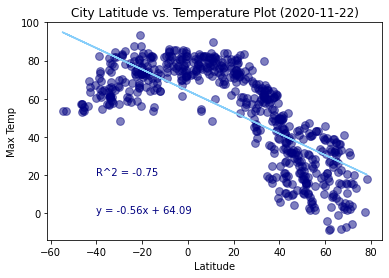

In [72]:
weather_data.plot(kind="scatter",x="Latitude",y="Max Temp",s=60, c='navy', edgecolors="navy",alpha=0.5)
title = "City Latitude vs. Temperature Plot ("+str(current_date)+")"
plt.title(title)

correlation_coef = round(st.pearsonr(weather_data['Latitude'],weather_data['Max Temp'])[0],2)
corr_coef = "R^2 = " + str(round(correlation_coef,2))

tw_slope, tw_int, tw_r, tw_p, tw_std_err = st.linregress(weather_data['Latitude'],weather_data['Max Temp'])
tw_fit = tw_slope * weather_data['Latitude'] + tw_int
reg_eq = "y = " + str(round(tw_slope,2)) + "x + " +str(round(tw_int,2))
plt.plot(weather_data['Latitude'],tw_fit,"lightskyblue")

plt.annotate(corr_coef,(-40,20), fontsize = 10, color="navy")
plt.annotate(reg_eq,(-40,0), fontsize = 10, color="navy")
plt.savefig("City_Lat_vs_Temp.png")
plt.show()

#### Latitude vs. Humidity Plot

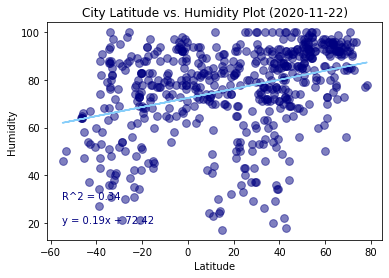

In [73]:
weather_data.plot(kind="scatter",x="Latitude",y="Humidity",s=60, c='navy', edgecolors="navy",alpha=0.5)
title = "City Latitude vs. Humidity Plot ("+str(current_date)+")"
plt.title(title)

correlation_coef = round(st.pearsonr(weather_data['Latitude'],weather_data['Humidity'])[0],2)
corr_coef = "R^2 = " + str(round(correlation_coef,2))

tw_slope, tw_int, tw_r, tw_p, tw_std_err = st.linregress(weather_data['Latitude'],weather_data['Humidity'])
tw_fit = tw_slope * weather_data['Latitude'] + tw_int
reg_eq = "y = " + str(round(tw_slope,2)) + "x + " +str(round(tw_int,2))
plt.plot(weather_data['Latitude'],tw_fit,"lightskyblue")

plt.annotate(corr_coef,(-55,30), fontsize = 10, color="navy")
plt.annotate(reg_eq,(-55,20), fontsize = 10, color="navy")

plt.savefig("City_Lat_vs_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

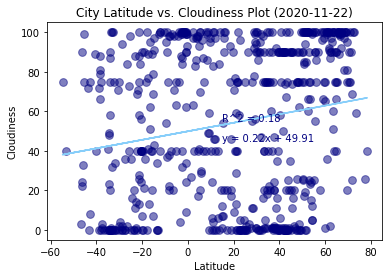

In [87]:
weather_data.plot(kind="scatter",x="Latitude",y="Cloudiness",s=60, c='navy', edgecolors="navy",alpha=0.5)
title = "City Latitude vs. Cloudiness Plot ("+str(current_date)+")"
plt.title(title)

correlation_coef = round(st.pearsonr(weather_data['Latitude'],weather_data['Cloudiness'])[0],2)
corr_coef = "R^2 = " + str(round(correlation_coef,2))

tw_slope, tw_int, tw_r, tw_p, tw_std_err = st.linregress(weather_data['Latitude'],weather_data['Cloudiness'])
tw_fit = tw_slope * weather_data['Latitude'] + tw_int
reg_eq = "y = " + str(round(tw_slope,2)) + "x + " +str(round(tw_int,2))
plt.plot(weather_data['Latitude'],tw_fit,"lightskyblue")

plt.annotate(corr_coef,(15,55), fontsize = 10, color="navy")
plt.annotate(reg_eq,(15,45), fontsize = 10, color="navy")

plt.savefig("City_Lat_vs_Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

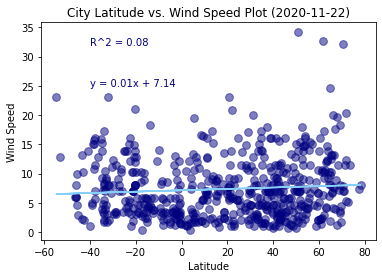

In [88]:

weather_data.plot(kind="scatter",x="Latitude",y="Wind Speed",s=60, c='navy', edgecolors="navy",alpha=0.5)
title = "City Latitude vs. Wind Speed Plot ("+str(current_date)+")"
plt.title(title)

correlation_coef = round(st.pearsonr(weather_data['Latitude'],weather_data['Wind Speed'])[0],2)
corr_coef = "R^2 = " + str(round(correlation_coef,2))

tw_slope, tw_int, tw_r, tw_p, tw_std_err = st.linregress(weather_data['Latitude'],weather_data['Wind Speed'])
tw_fit = tw_slope * weather_data['Latitude'] + tw_int
reg_eq = "y = " + str(round(tw_slope,2)) + "x + " +str(round(tw_int,2))
plt.plot(weather_data['Latitude'],tw_fit,"lightskyblue")

plt.annotate(corr_coef,(-40,32), fontsize = 10, color="navy")
plt.annotate(reg_eq,(-40,25), fontsize = 10, color="navy")


plt.savefig("City_Lat_vs_Windspeed.png")
plt.show()

In [76]:
North_Hemisphere = weather_data.loc[weather_data["Latitude"]>0]
North_Hemisphere.head(10)

,City,Latitude,Max Temp,Humidity,Cloudiness,Wind Speed
2,Erenhot,43.65,9.10,91,0,11.79
3,Nikolskoye,59.70,38.41,86,75,6.71
5,Tiksi,71.69,-5.76,90,69,5.26
9,Shache,38.42,18.95,77,92,6.89
10,Hong Kong,22.29,71.13,85,58,3.00
15,Butaritari,3.07,80.82,76,83,12.15
16,San Patricio,28.02,75.29,53,75,11.41
18,Albany,42.60,37.36,86,90,10.33
19,Yellowknife,62.46,3.06,84,90,10.29
21,Olafsvik,64.89,37.40,78,66,9.71


# Northern Hemisphere plots:

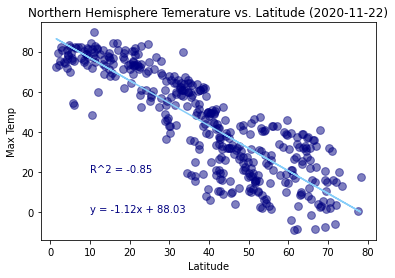

In [89]:
North_Hemisphere.plot(kind="scatter",x="Latitude",y="Max Temp",s=60, c='navy', edgecolors="navy",alpha=0.5)
title = "Northern Hemisphere Temerature vs. Latitude ("+str(current_date)+")"
plt.title(title)

correlation_coef = round(st.pearsonr(North_Hemisphere['Max Temp'],North_Hemisphere['Latitude'])[0],2)
corr_coef = "R^2 = " + str(round(correlation_coef,2))

tw_slope, tw_int, tw_r, tw_p, tw_std_err = st.linregress(North_Hemisphere['Latitude'],North_Hemisphere['Max Temp'])
tw_fit = tw_slope * North_Hemisphere['Latitude'] + tw_int
reg_eq = "y = " + str(round(tw_slope,2)) + "x + " +str(round(tw_int,2))
plt.plot(North_Hemisphere['Latitude'],tw_fit,"lightskyblue")

plt.annotate(corr_coef,(10,20), fontsize = 10, color="navy")
plt.annotate(reg_eq,(10,0), fontsize = 10, color="navy")
plt.savefig("NH_Temp_vs_Lat.png")
plt.show()

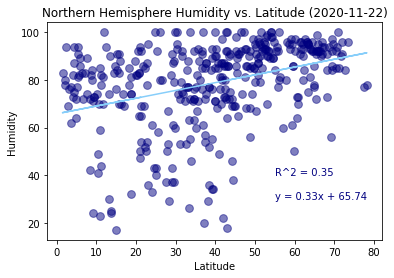

In [91]:
North_Hemisphere.plot(kind="scatter",x="Latitude",y="Humidity",s=60, c='navy', edgecolors="navy",alpha=0.5)
title = "Northern Hemisphere Humidity vs. Latitude ("+str(current_date)+")"
plt.title(title)

correlation_coef = round(st.pearsonr(North_Hemisphere['Humidity'],North_Hemisphere['Latitude'])[0],2)
corr_coef = "R^2 = " + str(round(correlation_coef,2))

tw_slope, tw_int, tw_r, tw_p, tw_std_err = st.linregress(North_Hemisphere['Latitude'],North_Hemisphere['Humidity'])
tw_fit = tw_slope * North_Hemisphere['Latitude'] + tw_int
reg_eq = "y = " + str(round(tw_slope,2)) + "x + " +str(round(tw_int,2))
plt.plot(North_Hemisphere['Latitude'],tw_fit,"lightskyblue")

plt.annotate(corr_coef,(55,40), fontsize = 10, color="navy")
plt.annotate(reg_eq,(55,30), fontsize = 10, color="navy")
plt.savefig("NH_Humid_vs_Lat.png")
plt.show()

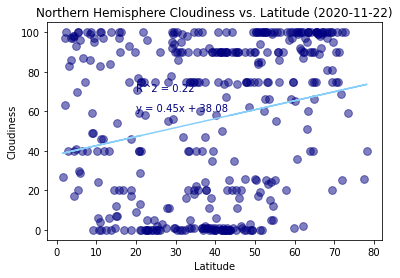

In [79]:
North_Hemisphere.plot(kind="scatter",x="Latitude",y="Cloudiness",s=60, c='navy', edgecolors="navy",alpha=0.5)
title = "Northern Hemisphere Cloudiness vs. Latitude ("+str(current_date)+")"
plt.title(title)

correlation_coef = round(st.pearsonr(North_Hemisphere['Cloudiness'],North_Hemisphere['Latitude'])[0],2)
corr_coef = "R^2 = " + str(round(correlation_coef,2))

tw_slope, tw_int, tw_r, tw_p, tw_std_err = st.linregress(North_Hemisphere['Latitude'],North_Hemisphere['Cloudiness'])
tw_fit = tw_slope * North_Hemisphere['Latitude'] + tw_int
reg_eq = "y = " + str(round(tw_slope,2)) + "x + " +str(round(tw_int,2))
plt.plot(North_Hemisphere['Latitude'],tw_fit,"lightskyblue")

plt.annotate(corr_coef,(20,70), fontsize = 10, color="navy")
plt.annotate(reg_eq,(20,60), fontsize = 10, color="navy")
plt.savefig("NH_Cloud_vs_Lat.png")
plt.show()

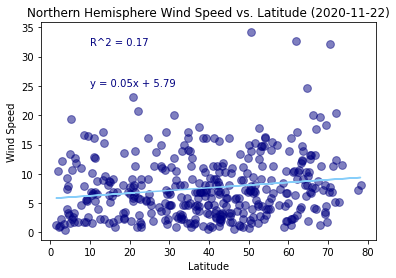

In [92]:
North_Hemisphere.plot(kind="scatter",x="Latitude",y="Wind Speed",s=60, c='navy', edgecolors="navy",alpha=0.5)
title = "Northern Hemisphere Wind Speed vs. Latitude ("+str(current_date)+")"
plt.title(title)

correlation_coef = round(st.pearsonr(North_Hemisphere['Wind Speed'],North_Hemisphere['Latitude'])[0],2)
corr_coef = "R^2 = " + str(round(correlation_coef,2))

tw_slope, tw_int, tw_r, tw_p, tw_std_err = st.linregress(North_Hemisphere['Latitude'],North_Hemisphere['Wind Speed'])
tw_fit = tw_slope * North_Hemisphere['Latitude'] + tw_int
reg_eq = "y = " + str(round(tw_slope,2)) + "x + " +str(round(tw_int,2))
plt.plot(North_Hemisphere['Latitude'],tw_fit,"lightskyblue")

plt.annotate(corr_coef,(10,32), fontsize = 10, color="navy")
plt.annotate(reg_eq,(10,25), fontsize = 10, color="navy")
plt.savefig("NH_Wind_vs_Lat.png")
plt.show()

# South Hemisphere plots:

In [81]:
South_Hemisphere = weather_data.loc[weather_data["Latitude"]<0]
South_Hemisphere.head(10)

,City,Latitude,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,-53.15,53.60,50,40,12.75
1,Merauke,-8.47,84.40,73,98,8.66
4,Bluff,-46.60,57.00,64,3,5.99
6,Ushuaia,-54.80,53.60,46,75,23.04
7,Mataura,-46.19,57.00,64,22,5.99
8,Port Alfred,-33.59,65.95,88,100,7.38
11,Rikitea,-23.12,74.66,74,11,5.53
12,Lebu,-37.62,54.34,91,3,5.70
13,Saint-Philippe,-21.36,68.00,73,88,6.93
14,Souillac,-20.52,73.40,83,40,8.05


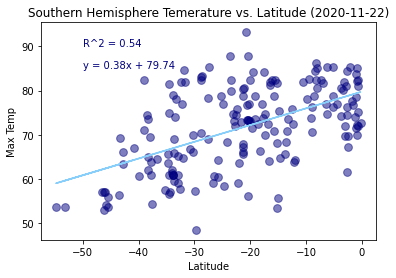

In [94]:
South_Hemisphere.plot(kind="scatter",x="Latitude",y="Max Temp",s=60, c='navy', edgecolors="navy",alpha=0.5)
title = "Southern Hemisphere Temerature vs. Latitude ("+str(current_date)+")"
plt.title(title)

correlation_coef = round(st.pearsonr(South_Hemisphere['Max Temp'],South_Hemisphere['Latitude'])[0],2)
corr_coef = "R^2 = " + str(round(correlation_coef,2))

tw_slope, tw_int, tw_r, tw_p, tw_std_err = st.linregress(South_Hemisphere['Latitude'],South_Hemisphere['Max Temp'])
tw_fit = tw_slope * South_Hemisphere['Latitude'] + tw_int
reg_eq = "y = " + str(round(tw_slope,2)) + "x + " +str(round(tw_int,2))
plt.plot(South_Hemisphere['Latitude'],tw_fit,"lightskyblue")

plt.annotate(corr_coef,(-50,90), fontsize = 10, color="navy")
plt.annotate(reg_eq,(-50,85), fontsize = 10, color="navy")
plt.savefig("SH_Temp_vs_Lat.png")
plt.show()

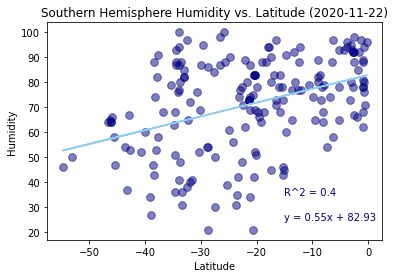

In [97]:
South_Hemisphere.plot(kind="scatter",x="Latitude",y="Humidity",s=60, c='navy', edgecolors="navy",alpha=0.5)
title = "Southern Hemisphere Humidity vs. Latitude ("+str(current_date)+")"
plt.title(title)

correlation_coef = round(st.pearsonr(South_Hemisphere['Humidity'],South_Hemisphere['Latitude'])[0],2)
corr_coef = "R^2 = " + str(round(correlation_coef,2))

tw_slope, tw_int, tw_r, tw_p, tw_std_err = st.linregress(South_Hemisphere['Latitude'],South_Hemisphere['Humidity'])
tw_fit = tw_slope * South_Hemisphere['Latitude'] + tw_int
reg_eq = "y = " + str(round(tw_slope,2)) + "x + " +str(round(tw_int,2))
plt.plot(South_Hemisphere['Latitude'],tw_fit,"lightskyblue")

plt.annotate(corr_coef,(-15, 35), fontsize = 10, color="navy")
plt.annotate(reg_eq,(-15, 25), fontsize = 10, color="navy")
plt.savefig("SH_Humid_vs_Lat.png")
plt.show()

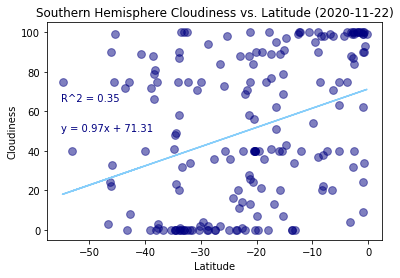

In [98]:
South_Hemisphere.plot(kind="scatter",x="Latitude",y="Cloudiness",s=60, c='navy', edgecolors="navy",alpha=0.5)
title = "Southern Hemisphere Cloudiness vs. Latitude ("+str(current_date)+")"
plt.title(title)

correlation_coef = round(st.pearsonr(South_Hemisphere['Cloudiness'],South_Hemisphere['Latitude'])[0],2)
corr_coef = "R^2 = " + str(round(correlation_coef,2))

tw_slope, tw_int, tw_r, tw_p, tw_std_err = st.linregress(South_Hemisphere['Latitude'],South_Hemisphere['Cloudiness'])
tw_fit = tw_slope * South_Hemisphere['Latitude'] + tw_int
reg_eq = "y = " + str(round(tw_slope,2)) + "x + " +str(round(tw_int,2))
plt.plot(South_Hemisphere['Latitude'],tw_fit,"lightskyblue")

plt.annotate(corr_coef,(-55,65), fontsize = 10, color="navy")
plt.annotate(reg_eq,(-55,50), fontsize = 10, color="navy")
plt.savefig("SH_Cloud_vs_Lat.png")
plt.show()

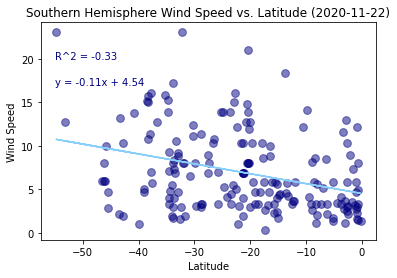

In [100]:
South_Hemisphere.plot(kind="scatter",x="Latitude",y="Wind Speed",s=60, c='navy', edgecolors="navy",alpha=0.5)
title = "Southern Hemisphere Wind Speed vs. Latitude ("+str(current_date)+")"
plt.title(title)

correlation_coef = round(st.pearsonr(South_Hemisphere['Wind Speed'],South_Hemisphere['Latitude'])[0],2)
corr_coef = "R^2 = " + str(round(correlation_coef,2))

tw_slope, tw_int, tw_r, tw_p, tw_std_err = st.linregress(South_Hemisphere['Latitude'],South_Hemisphere['Wind Speed'])
tw_fit = tw_slope * South_Hemisphere['Latitude'] + tw_int
reg_eq = "y = " + str(round(tw_slope,2)) + "x + " +str(round(tw_int,2))
plt.plot(South_Hemisphere['Latitude'],tw_fit,"lightskyblue")

plt.annotate(corr_coef,(-55,20), fontsize = 10, color="navy")
plt.annotate(reg_eq,(-55,17), fontsize = 10, color="navy")
plt.savefig("SH_Wind_vs_Lat.png")
plt.show()